# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [13]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [14]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=100)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=100)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(len(cities))

82


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [15]:
#Creating lists to hold values to later populate dataframe
lats = []
lons = []
max_temps = []
humidities = []
clouds = []
wind_speeds = []
countries =  []
dates = []
skip_counter = 0

#Beginning of print process
print("Beginning Data Retrieval")
print("------------------------------")

#Loop through each city in cities and generate json link to pull data
for name in cities:
    weather_url = f"https://api.openweathermap.org/data/2.5/weather?q={name}&appid={weather_api_key}&units=metric"
    response = requests.get(weather_url).json()

    #Catch exception in case no data found for selected city
    try:
        #Store data into variables
        lat = response["coord"]["lat"]
        lon = response["coord"]["lon"]
        max_temp = response["main"]["temp_max"]
        humidity = response["main"]["humidity"]
        cloudiness = response["clouds"]["all"]
        wind_speed = response["wind"]["speed"]
        country = response["sys"]["country"]
        date = response["dt"]

        #Append data to corresponding lists
        lats.append(lat)
        lons.append(lon)
        max_temps.append(max_temp)
        humidities.append(humidity)
        clouds.append(cloudiness)
        wind_speeds.append(wind_speed)
        countries.append(country)
        dates.append(date)

        #Print log of city being processed
        print(f"Processing record {cities.index(name)} | {name.capitalize()}")
        print(f"Data visual: {len(lats)}\n")
    except KeyError:
        print(f"No data found for {name.capitalize()}. Skipping...")

        #Remove city from cities list for easier dataframe creation later
        #cities.remove(name)
        lats.append("")
        lons.append("")
        max_temps.append("")
        humidities.append("")
        clouds.append("")
        wind_speeds.append("")
        countries.append("")
        dates.append("")
        print(f"Data visual: {len(lats)}\n")
        skip_counter += 1

#End of print process
print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

print(f"Number of Skips: {skip_counter}")

Beginning Data Retrieval
------------------------------
Processing record 0 | Nemuro
Data visual: 1

Processing record 1 | Rikitea
Data visual: 2

Processing record 2 | Cape town
Data visual: 3

Processing record 3 | Karema
Data visual: 4

Processing record 4 | Tuktoyaktuk
Data visual: 5

Processing record 5 | Vaini
Data visual: 6

Processing record 6 | Mar del plata
Data visual: 7

No data found for Barentsburg. Skipping...
Data visual: 8

No data found for Taolanaro. Skipping...
Data visual: 9

Processing record 9 | Kruisfontein
Data visual: 10

Processing record 10 | Sinnamary
Data visual: 11

Processing record 11 | Karratha
Data visual: 12

Processing record 12 | Albany
Data visual: 13

Processing record 13 | Nagua
Data visual: 14

Processing record 14 | Berlevag
Data visual: 15

Processing record 15 | Bambous virieux
Data visual: 16

Processing record 16 | Vung tau
Data visual: 17

Processing record 17 | Kloulklubed
Data visual: 18

Processing record 18 | Coihaique
Data visual: 19

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [16]:
#Create dataframe
raw_data = {"City": cities, "Lat": lats, "Lon": lons, "Max Temp": max_temps, "Humidity": humidities, "Cloudiness": clouds, "Wind Speed": wind_speeds, "Country": countries, "Date": dates}

city_data = pd.DataFrame(raw_data)

#Find indexes where Lat is blank for future removal
index_names = city_data[city_data["Lat"] == ""].index

city_data.drop(index_names, inplace = True)

#Export dataframe to a csv file
city_data.to_csv("../output_data/cities.csv", index = False, header = True)

#Print out cleaned dataframe
city_data

,City,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,nemuro,43.32,145.57,9.96,61,66,10.01,JP,1602687474
1,rikitea,-23.12,-134.97,22.91,78,6,7.79,PF,1602687474
2,cape town,-33.93,18.42,24.44,43,16,5.1,ZA,1602687474
3,karema,-6.82,30.44,27.33,58,23,0.39,TZ,1602687474
4,tuktoyaktuk,69.45,-133.04,-7,79,75,2.1,CA,1602687475
...,...,...,...,...,...,...,...,...,...
76,kumluca,36.37,30.29,24.23,63,8,3.85,TR,1602687494
77,butaritari,3.07,172.79,27.87,74,100,6.06,KI,1602687494
78,bonthe,7.53,-12.51,28.95,68,81,3.25,SL,1602687495
80,busselton,-33.65,115.33,14.44,67,0,5.77,AU,1602687495


In [17]:
over_100 = city_data.loc[city_data["Humidity"] < 50]

over_100

,City,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
2,cape town,-33.93,18.42,24.44,43,16,5.1,ZA,1602687474
9,kruisfontein,-34,24.73,21.67,49,0,2.68,ZA,1602687476
11,karratha,-20.74,116.85,27.18,42,0,5.13,AU,1602687271
18,coihaique,-45.58,-72.07,10,43,75,3.6,CL,1602687479
21,umm kaddadah,13.6,26.69,36.17,13,0,4.27,SD,1602687479
39,punta alta,-38.88,-62.07,16.17,39,7,8.38,AR,1602687484
42,torremolinos,36.62,-4.5,25,29,3,9.8,ES,1602687312
44,pahrump,36.21,-115.98,23.89,29,1,0.43,US,1602687485
57,castro,-24.79,-50.01,29.39,37,28,2.37,BR,1602687489
63,tessalit,20.2,1.01,37.86,9,0,5.41,ML,1602687490


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [18]:
#  Get the indices of cities that have humidity over 100%.
humid_index = city_data[city_data["Humidity"] < 50].index
humid_index

Int64Index([2, 9, 11, 18, 21, 39, 42, 44, 57, 63, 65, 72], dtype='int64')

In [19]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = city_data.drop(humid_index, inplace = False)

clean_city_data

,City,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,nemuro,43.32,145.57,9.96,61,66,10.01,JP,1602687474
1,rikitea,-23.12,-134.97,22.91,78,6,7.79,PF,1602687474
3,karema,-6.82,30.44,27.33,58,23,0.39,TZ,1602687474
4,tuktoyaktuk,69.45,-133.04,-7,79,75,2.1,CA,1602687475
5,vaini,-21.2,-175.2,21,83,40,3.1,TO,1602687475
...,...,...,...,...,...,...,...,...,...
76,kumluca,36.37,30.29,24.23,63,8,3.85,TR,1602687494
77,butaritari,3.07,172.79,27.87,74,100,6.06,KI,1602687494
78,bonthe,7.53,-12.51,28.95,68,81,3.25,SL,1602687495
80,busselton,-33.65,115.33,14.44,67,0,5.77,AU,1602687495


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

<Figure size 432x288 with 0 Axes>

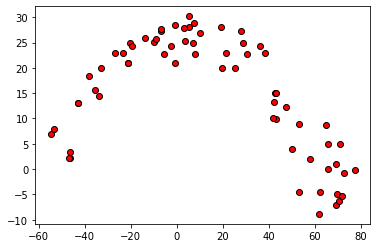

In [22]:
lat_vs_temp = plt.scatter(clean_city_data["Lat"], clean_city_data["Max Temp"], marker = "o", facecolors = "red", edgecolors = "black")
plt.xlabel = "Latitude"
plt.ylabel = "Max Temperature (F)"
plt.title = "Latitude vs Max Temp (F)"
plt.savefig("../output_data/Latitude vs Max Temp.png")
plt.show()

## Latitude vs. Humidity Plot

## Latitude vs. Cloudiness Plot

## Latitude vs. Wind Speed Plot

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression